# Project Goal

### To predict the coffee stock closing price using Facebook Prophet

In [1]:
# Import libraries and packages

import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.graph_objects as go

from prophet import Prophet

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/daily-coffee-price/coffee.csv


In [2]:
# import the dataset
coffee_data = pd.read_csv('/kaggle/input/daily-coffee-price/coffee.csv', parse_dates=['Date'])
coffee_data.head()

,Date,Open,High,Low,Close,Volume,Currency
0,2000-01-03,122.25,124.00,116.10,116.50,6640,USD
1,2000-01-04,116.25,120.50,115.75,116.25,5492,USD
2,2000-01-05,115.00,121.00,115.00,118.60,6165,USD
3,2000-01-06,119.00,121.40,116.50,116.85,5094,USD
4,2000-01-07,117.25,117.75,113.80,114.15,6855,USD


In [3]:
coffee_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5746 entries, 0 to 5745
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      5746 non-null   datetime64[ns]
 1   Open      5746 non-null   float64       
 2   High      5746 non-null   float64       
 3   Low       5746 non-null   float64       
 4   Close     5746 non-null   float64       
 5   Volume    5746 non-null   int64         
 6   Currency  5746 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 314.4+ KB


In [4]:
# 'Close' is the target variable
# drop 'Currency' column
coffee_data.drop(['Currency'], axis=1, inplace=True)

In [5]:
coffee_data.describe()

,Open,High,Low,Close,Volume
count,5746.000000,5746.000000,5746.000000,5746.000000,5746.000000
mean,127.267635,128.847034,125.784669,127.215567,8807.178907
std,50.569425,51.164948,49.851487,50.506519,9612.789034
min,41.500000,42.000000,41.500000,41.500000,0.000000
25%,98.800000,100.112500,97.862500,98.650000,61.000000
50%,120.400000,121.600000,118.950000,120.250000,7008.000000
75%,144.800000,146.000000,143.000000,144.337500,14497.750000
max,305.300000,306.250000,304.000000,304.900000,62045.000000


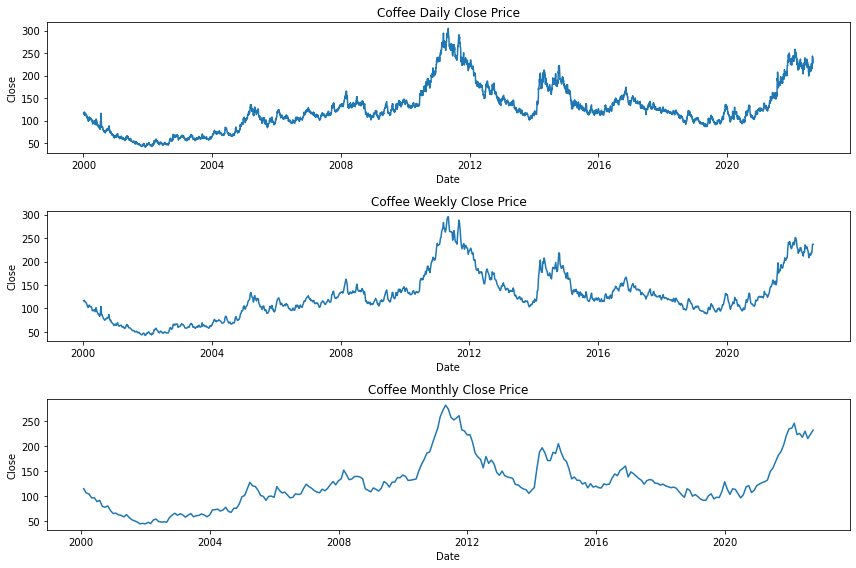

In [6]:
# Resample the data on 'Close' price weekly
sale_weekly = coffee_data.resample('W', on='Date').mean()

# Resample the data on 'Close' price monthly
sale_monthly = coffee_data.resample('M', on='Date').mean()

# Visualization
fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(12,8))

sns.lineplot(x='Date', y='Close', data=coffee_data, ax=ax1)
ax1.set_title('Coffee Daily Close Price')

sns.lineplot(x='Date', y='Close', data=sale_weekly, ax=ax2)
ax2.set_title('Coffee Weekly Close Price')

sns.lineplot(x='Date', y='Close', data=sale_monthly, ax=ax3)
ax3.set_title('Coffee Monthly Close Price')

plt.tight_layout()

# Train the model

In [7]:
# Dataset for forecasting
coffee_price = coffee_data[['Date','Close']]
coffee_price = coffee_price.rename(columns = {'Date':'ds', 'Close':'y'})

# Splitting train-test sets
train_set = coffee_price[:-365]
test_set = coffee_price[-365:]

# Fit the model to the train data
m = Prophet(yearly_seasonality=True )
m.add_country_holidays(country_name='US')
m.fit(train_set)

18:57:54 - cmdstanpy - INFO - Chain [1] start processing
18:58:00 - cmdstanpy - INFO - Chain [1] done processing


# Forecast

<AxesSubplot:xlabel='ds', ylabel='y'>

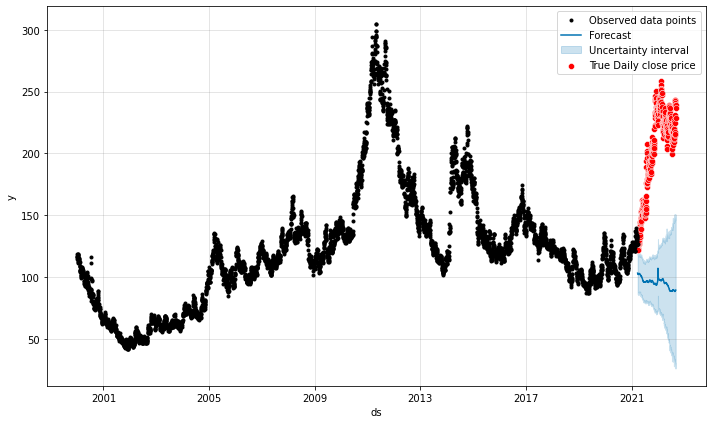

In [8]:
# Make a forecast model
prophet_pred = m.predict(test_set)

# Plot the forecast results
pred_plot = m.plot(prophet_pred)
sns.scatterplot(x='ds', y='y', data=test_set, color = 'r', label='True Daily close price')

# Findings

* The forecast for the daily close price of coffee over a period of 365 days (solid blue line) is far off from the true close price (red line)
* This indicates that the data can be influenced by other features leading to a very low accuracy prediction

# Further Analysis

### Study the Features resulted from the Test set

In [9]:
prophet_pred.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Christmas Day,Christmas Day_lower,Christmas Day_upper,Christmas Day (Observed),...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-03-25,101.886121,88.103238,118.503780,101.886121,101.886121,0.0,0.0,0.0,0.0,...,-0.891424,-0.891424,-0.891424,2.078438,2.078438,2.078438,0.0,0.0,0.0,103.073135
1,2021-03-26,101.866222,86.440334,118.005701,101.866222,101.866222,0.0,0.0,0.0,0.0,...,-1.084787,-1.084787,-1.084787,1.915227,1.915227,1.915227,0.0,0.0,0.0,102.696662
2,2021-03-29,101.806527,85.787979,118.972166,101.806527,101.806527,0.0,0.0,0.0,0.0,...,-1.103091,-1.103091,-1.103091,1.530121,1.530121,1.530121,0.0,0.0,0.0,102.233557
3,2021-03-30,101.786629,87.579882,117.490367,101.786629,101.786629,0.0,0.0,0.0,0.0,...,-0.873171,-0.873171,-0.873171,1.441685,1.441685,1.441685,0.0,0.0,0.0,102.355143
4,2021-03-31,101.766730,87.264934,117.528842,101.766730,101.766730,0.0,0.0,0.0,0.0,...,-0.836891,-0.836891,-0.836891,1.374621,1.374621,1.374621,0.0,0.0,0.0,102.304460


In [10]:
# prepare for plotting on the predicted values from test set
prophet_plot = prophet_pred[['ds','trend','yearly','holidays','yhat']]
prophet_plot = prophet_plot.rename(columns={'yearly':'season'})
prophet_plot.head()

,ds,trend,season,holidays,yhat
0,2021-03-25,101.886121,2.078438,0.0,103.073135
1,2021-03-26,101.866222,1.915227,0.0,102.696662
2,2021-03-29,101.806527,1.530121,0.0,102.233557
3,2021-03-30,101.786629,1.441685,0.0,102.355143
4,2021-03-31,101.766730,1.374621,0.0,102.304460


In [11]:
prophet_plot = prophet_plot.sort_values(by='ds')
fig = make_subplots(rows=3, cols=1, subplot_titles=('trend','season','holidays'))

fig.add_trace(go.Scatter(x=prophet_plot['ds'], y=prophet_plot['trend']), row=1, col=1)
fig.add_trace(go.Scatter(x=prophet_plot['ds'], y=prophet_plot['season']), row=2, col=1)
fig.add_trace(go.Scatter(x=prophet_plot['ds'], y=prophet_plot['holidays']), row=3, col=1)

### Study the features on the original dataset: Fit and predict on the 'coffee_price' df

In [12]:
# Fit the model to the data
m = Prophet(yearly_seasonality=True)
m.add_country_holidays(country_name='US')
m.fit(coffee_price)

18:58:03 - cmdstanpy - INFO - Chain [1] start processing
18:58:08 - cmdstanpy - INFO - Chain [1] done processing


In [13]:
# Predict for the next 365-day period
df_pred = m.make_future_dataframe(periods=365, include_history=True)
coffee_pred = m.predict(df_pred)

In [14]:
# Prepare for ploting
coffee_plot = coffee_pred[['ds','trend','yearly','holidays']]
coffee_plot = coffee_plot.rename(columns={'yearly':'season'})
coffee_plot.head()

,ds,trend,season,holidays
0,2000-01-03,105.872561,3.568250,0.0
1,2000-01-04,105.779223,3.713928,0.0
2,2000-01-05,105.685885,3.840323,0.0
3,2000-01-06,105.592547,3.947281,0.0
4,2000-01-07,105.499209,4.035007,0.0


In [15]:
coffee_plot = coffee_plot.sort_values(by='ds')
fig = make_subplots(rows=3, cols=1, subplot_titles=('trend','season','holidays'))

fig.add_trace(go.Scatter(x=coffee_plot['ds'], y=coffee_plot['trend']), row=1, col=1)
fig.add_trace(go.Scatter(x=coffee_plot['ds'], y=coffee_plot['season']), row=2, col=1)
fig.add_trace(go.Scatter(x=coffee_plot['ds'], y=coffee_plot['holidays']), row=3, col=1)

fig.show()

### Decompose: Trend and seasonality

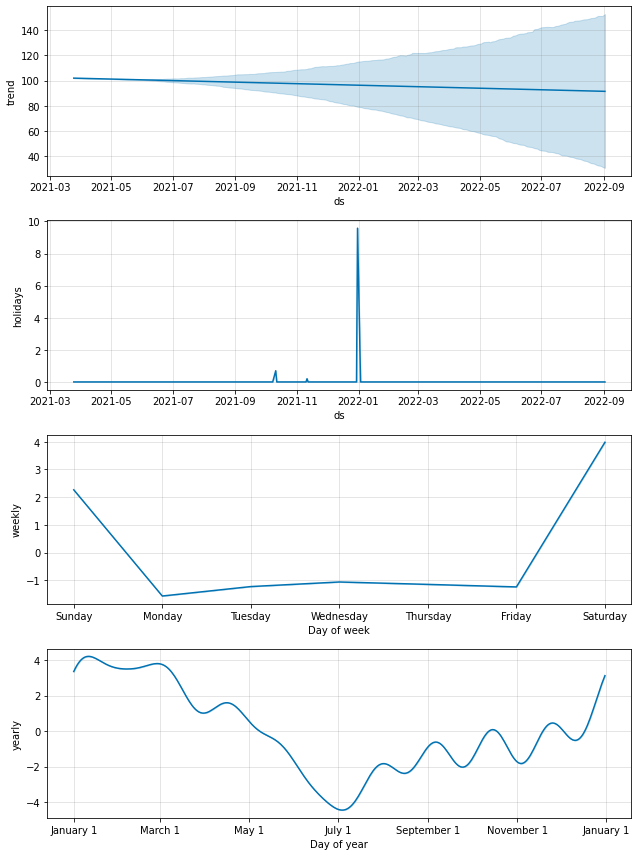

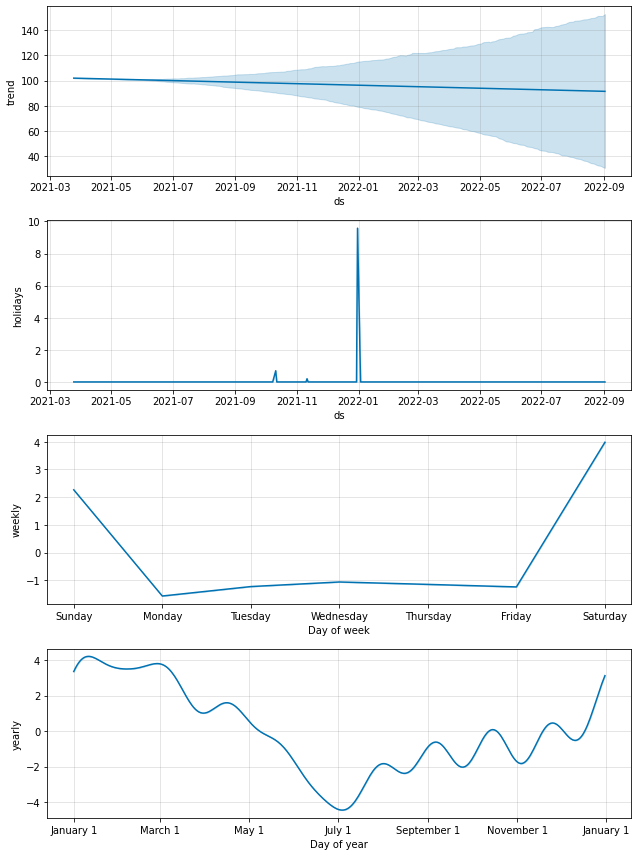

In [16]:
# On the test set
m.plot_components(prophet_pred)

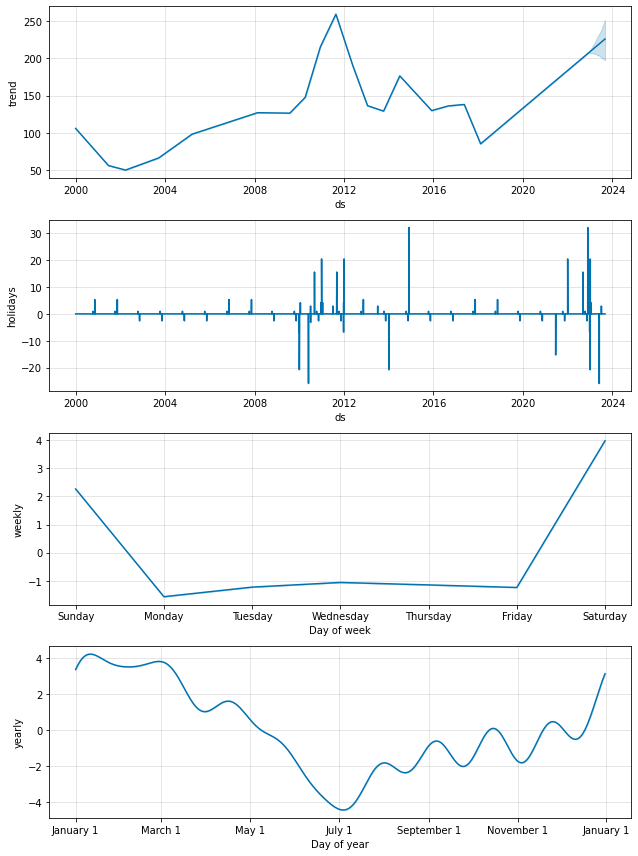

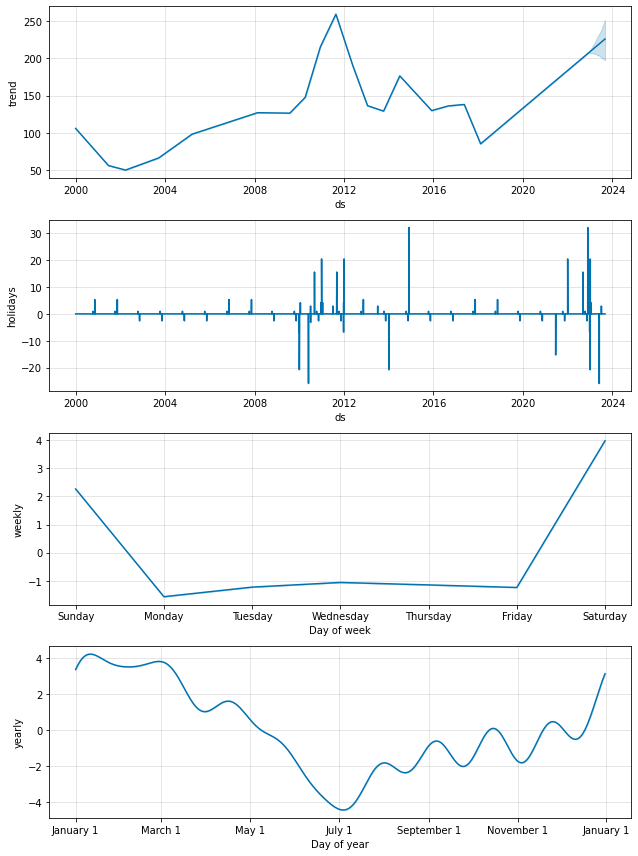

In [17]:
# On the original set
m.plot_components(coffee_pred)

# Conclusions

The given dataset on the coffee stock price doesn't exhibit a clear trend over the period of 2000-2020. Coffee beans is one of the produce hihgly consumed around the world. Its demand can only be expected to increase or at least stay stable, which means a stable with small fluctuation in stock price. That can be seen in any other years except for 2011-2012. We observe a sharp increase in price starting in 2011 and at its peak in 2012. A quick review on these years showed poor weather and farming conditions leading to poor haverst [1]. 

Although the model poorly predicted the coffee price for 2021-2022, it can be explained due to unexpected factors. Brazil, one of the largest coffee farms that provided 35% coffee beans worlwide, suffered poor weather, drought and frost seasons, also the continous freight cost and supply chain issues resulting from Covid-19.

Within a year, coffee price usually drops in May and picks up again in late July. This behaviour is observed when we investigate the seasonaliy (yearly vs Day of year) in both cases: 
- prediction on the year 2022 vs true price in 2022 and 
- prediction on extra 365-day period (year 2023) based on the historical dataset 

[1] https://www.theguardian.com/business/2011/apr/21/commodities-coffee-shortage-price-rise-expected